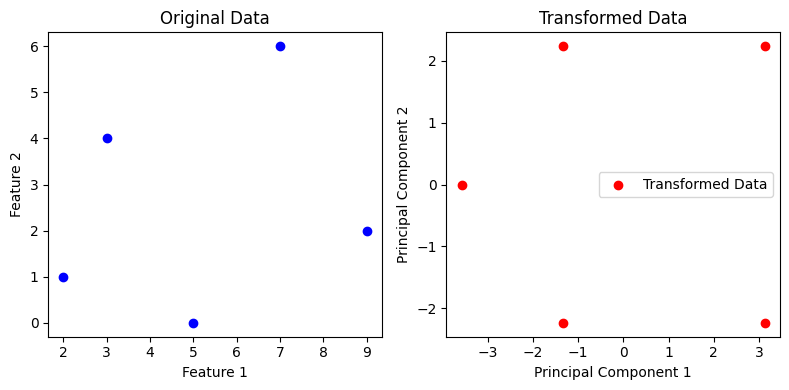

In [7]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])
X_mean = np.mean(X, axis=0)

X_centered = X - X_mean
cov_X = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_X)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

X_transformed = np.dot(X_centered, eigenvectors)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='b', label='Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c='r', label='Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Transformed Data')

plt.legend()
plt.tight_layout()
plt.show()


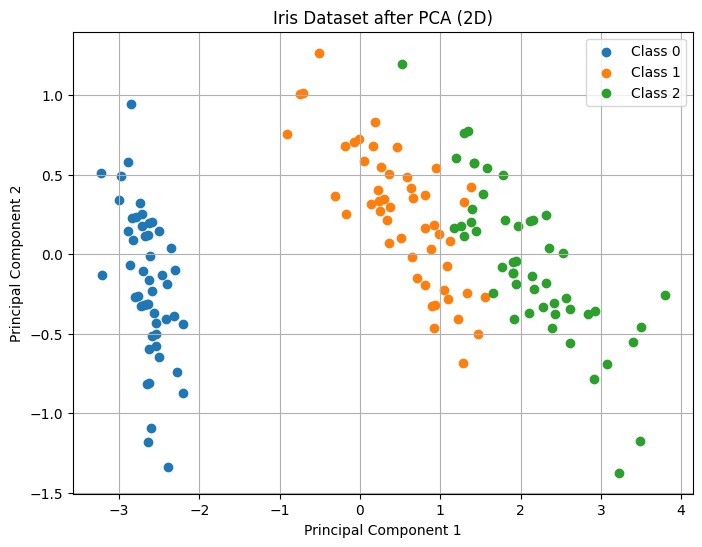

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X_mean = np.mean(X, axis=0)
X_centered = X - X_mean
cov_X = np.cov(X_centered, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_X)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
projection_matrix = eigenvectors[:, :2]
X_transformed = np.dot(X_centered, projection_matrix)

plt.figure(figsize=(8, 6))

for target in np.unique(y):
    plt.scatter(X_transformed[y == target, 0], X_transformed[y == target, 1], label=f'Class {target}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset after PCA (2D)')
plt.legend()
plt.grid(True)
plt.show()
